# Random forest model

In [1]:
import os
import xarray as xr
import pandas as pd
import numpy as np

In [2]:
path = "/g/data/w42/dr6273/work/projects/Aus_energy/"

# Load predictors and predictands

Detrended energy demand (predicand)

In [3]:
dem_da = xr.open_dataset(
    path + "/data/energy_demand/daily_demand_2010-2020_detrended.nc"
)["demand_dt"]

Predictors. Load everything from relevant directory.

In [5]:
files = [path + "demand_predictors/" + i for i in os.listdir(path + "demand_predictors/")]

In [13]:
pred_ds = xr.open_mfdataset(files, combine="nested", compat="override").compute()

In [14]:
pred_ds

<xarray.Dataset>
Dimensions:   (time: 23376, region: 6)
Coordinates:
  * time      (time) datetime64[ns] 1959-01-01 1959-01-02 ... 2022-12-31
  * region    (region) object 'NEM' 'NSW' 'VIC' 'QLD' 'SA' 'TAS'
Data variables: (12/15)
    t2min     (time, region) float64 3.731 4.784 1.395 5.707 ... 3.89 6.01 7.078
    t2m3      (time, region) float64 nan nan nan nan ... 5.847 3.173 4.084 5.304
    msdwswrf  (time, region) float64 nan nan nan nan ... 118.1 37.95 170.4 132.2
    cdd4      (time, region) float64 nan nan nan ... -0.05162 -0.1232 -0.004046
    t2m       (time, region) float64 3.111 3.292 1.624 ... 3.154 7.556 7.818
    cdd3      (time, region) float64 nan nan nan ... -0.06984 -0.004046
    ...        ...
    mtpr      (time, region) float64 2.958e-06 4.037e-05 ... -1.798e-05
    rh        (time, region) float64 0.6465 2.648 -1.703 ... 1.19 -4.779 -0.9297
    w10       (time, region) float64 0.6778 1.295 1.009 ... -0.9618 0.6178
    t2max     (time, region) float64 2.693 1.874 1.861 ... 1.868 8.924 8.581
    hdd3      (time, region) float64 nan nan nan nan ... -0.8614 -3.161 -4.863
    t2m4      (time, region) float64 nan nan nan nan ... 4.833 2.91 3.071 4.58

In [15]:
pred_ds.data_vars

Data variables:
    t2min     (time, region) float64 3.731 4.784 1.395 5.707 ... 3.89 6.01 7.078
    t2m3      (time, region) float64 nan nan nan nan ... 5.847 3.173 4.084 5.304
    msdwswrf  (time, region) float64 nan nan nan nan ... 118.1 37.95 170.4 132.2
    cdd4      (time, region) float64 nan nan nan ... -0.05162 -0.1232 -0.004046
    t2m       (time, region) float64 3.111 3.292 1.624 ... 3.154 7.556 7.818
    cdd3      (time, region) float64 nan nan nan ... -0.06984 -0.004046
    cdd       (time, region) float64 0.0623 -0.06739 ... 0.3187 -0.004045
    hdd4      (time, region) float64 nan nan nan nan ... -0.8615 -2.688 -4.286
    hdd       (time, region) float64 -2.207 -2.896 -2.111 ... -3.735 -6.242
    mtpr      (time, region) float64 2.958e-06 4.037e-05 ... -1.798e-05
    rh        (time, region) float64 0.6465 2.648 -1.703 ... 1.19 -4.779 -0.9297
    w10       (time, region) float64 0.6778 1.295 1.009 ... -0.9618 0.6178
    t2max     (time, region) float64 2.693 1.874 1.861 

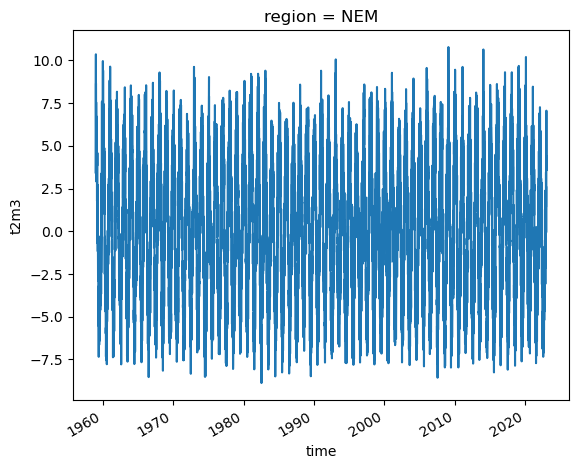

In [18]:
pred_ds.t2m3.sel(region="NEM").plot()